In [1]:
import pandas as pd
from RhythmCount import data_processing as dproc
from RhythmCount import plot as plot
from IPython.display import Markdown as md, display

results = pd.DataFrame()

 # Obdobje 20.10.2020-10.2.2021


  Varianca:  276277.6128825508  Povprečje:  1339.73417721519


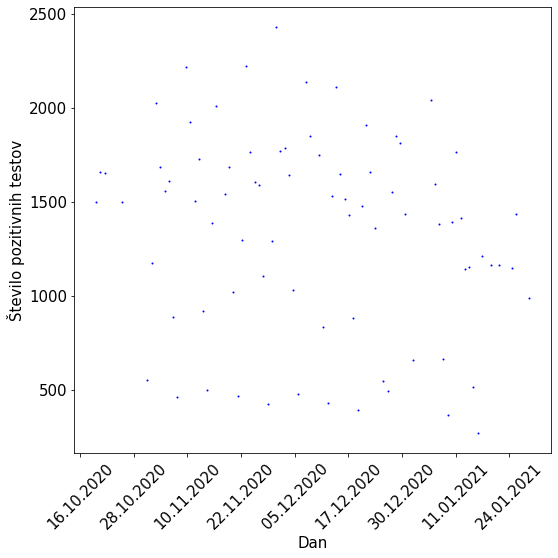

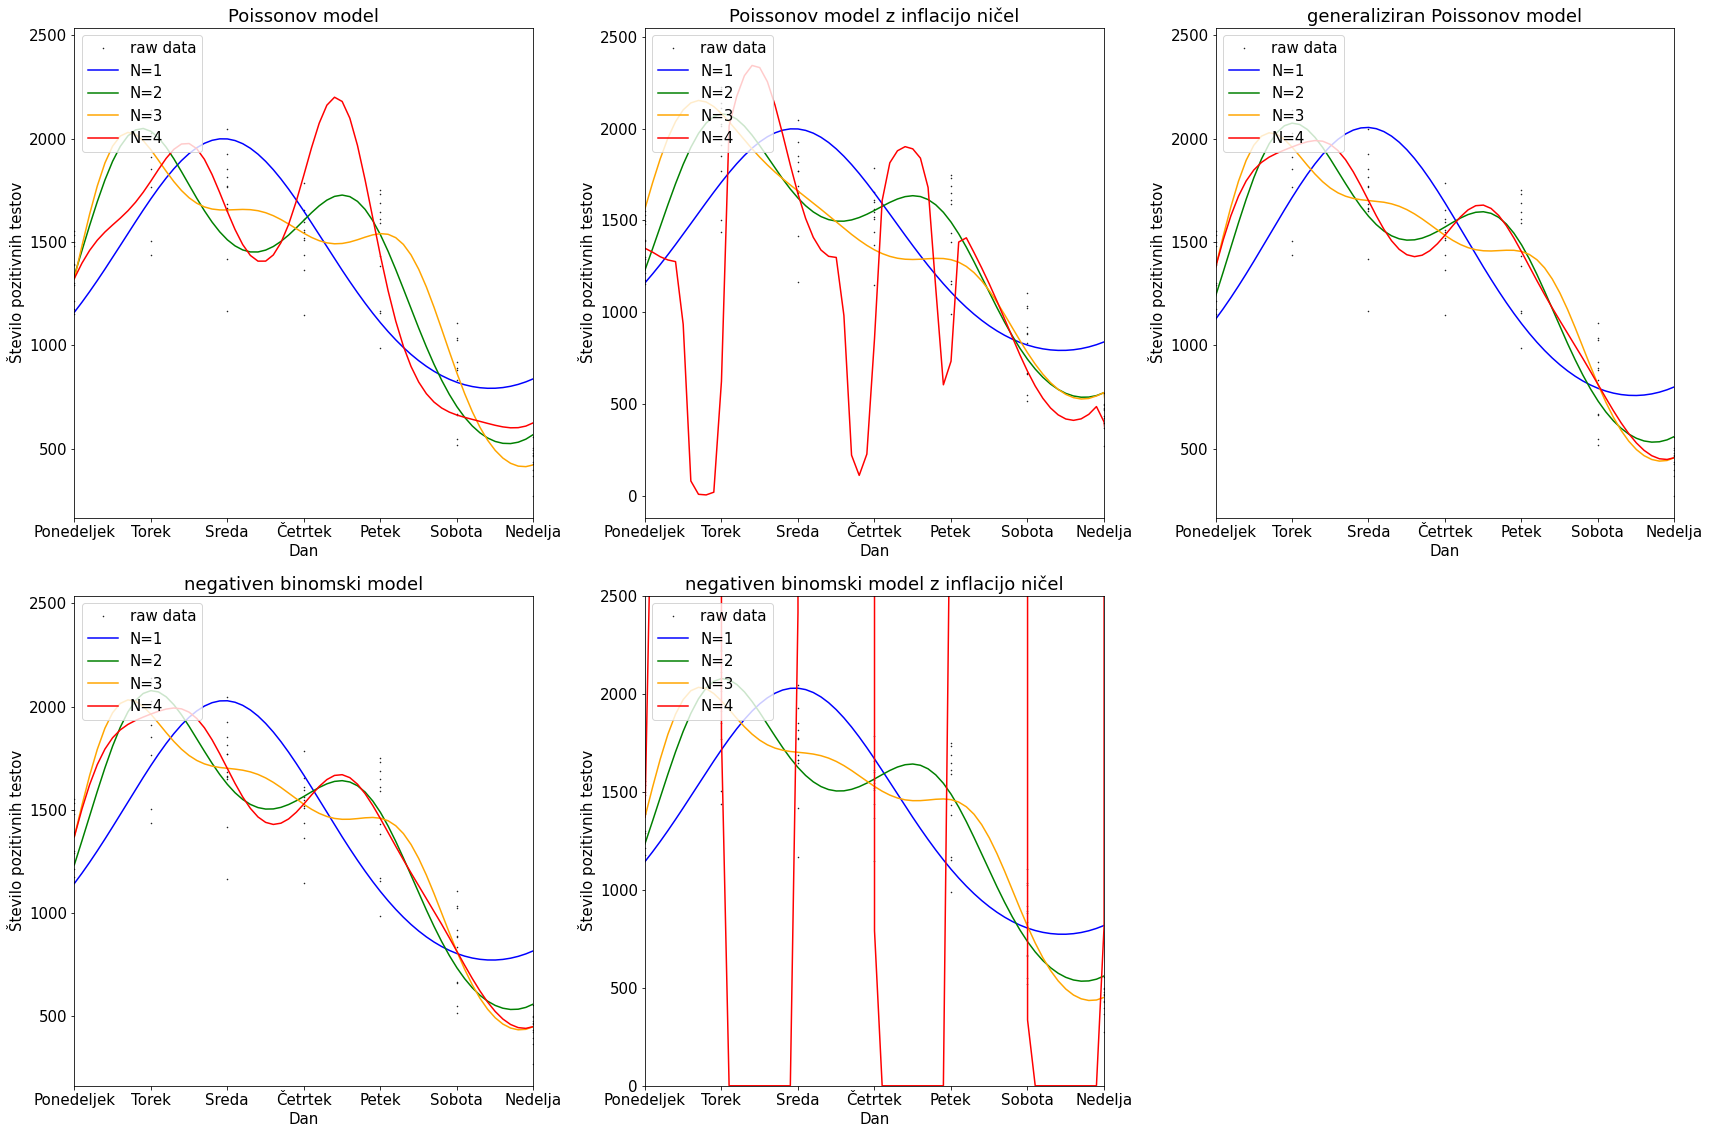

Optimalno št. komponent in tip modela:
Št. komponent: 3
Tip modela: gen_poisson


In [2]:
df_first = pd.read_csv(r'data/data_first.csv')

df_first['date'] = pd.to_datetime(df_first['date'], format='%Y-%m-%d', errors='ignore')

df_first = df_first[['day', 'tests.positive', 'date']]
df_first.columns = ['X', 'Y', 'date']
df_first = dproc.clean_data(df_first)

plot.plot_raw_data(df_first, "", 300, save_file_to="raw_first.pdf")
df_results = dproc.fit_to_models(df_first, period=7, n_components=[1, 2, 3, 4], ax_lim=2500,
                                 save_file_to="models_first.pdf")
n_components1 = int(dproc.get_best_n_components(df_results, 'AIC').n_components)
print("Optimalno št. komponent in tip modela:")
print("Št. komponent: {}".format(n_components1))
model_type1 = dproc.get_best_model_type(df_results, 'Vuong').model_type
print("Tip modela: {}".format(model_type1))
best_model = df_results.loc[
    (df_results['n_components'] == n_components1) & (df_results['model_type'].str.match(model_type1))].iloc[0]

CIs_params = dproc.calculate_confidence_intervals_parameters(df_first, n_components1, model_type1, best_model['peaks'],
                                                             period=7)
best_model = best_model.to_dict()
best_model.update(CIs_params)
best_model['obdobje'] = "20.10.2020-10.2.2021"
results = results.append(best_model, ignore_index=True)

# Obdobje 11.2.2021-26.4.2021

  Varianca:  90328.12543209876  Povprečje:  796.3111111111111


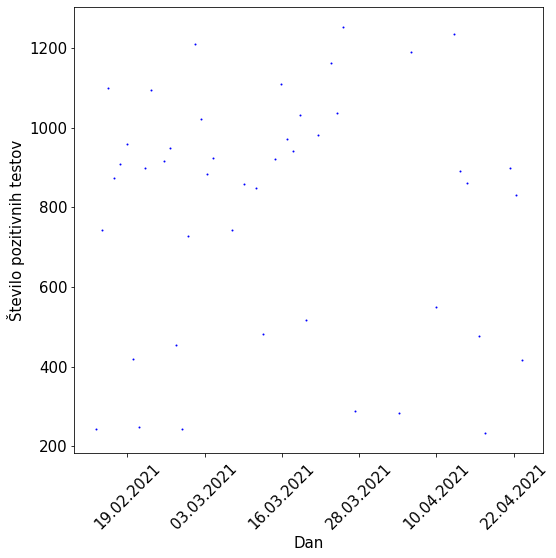

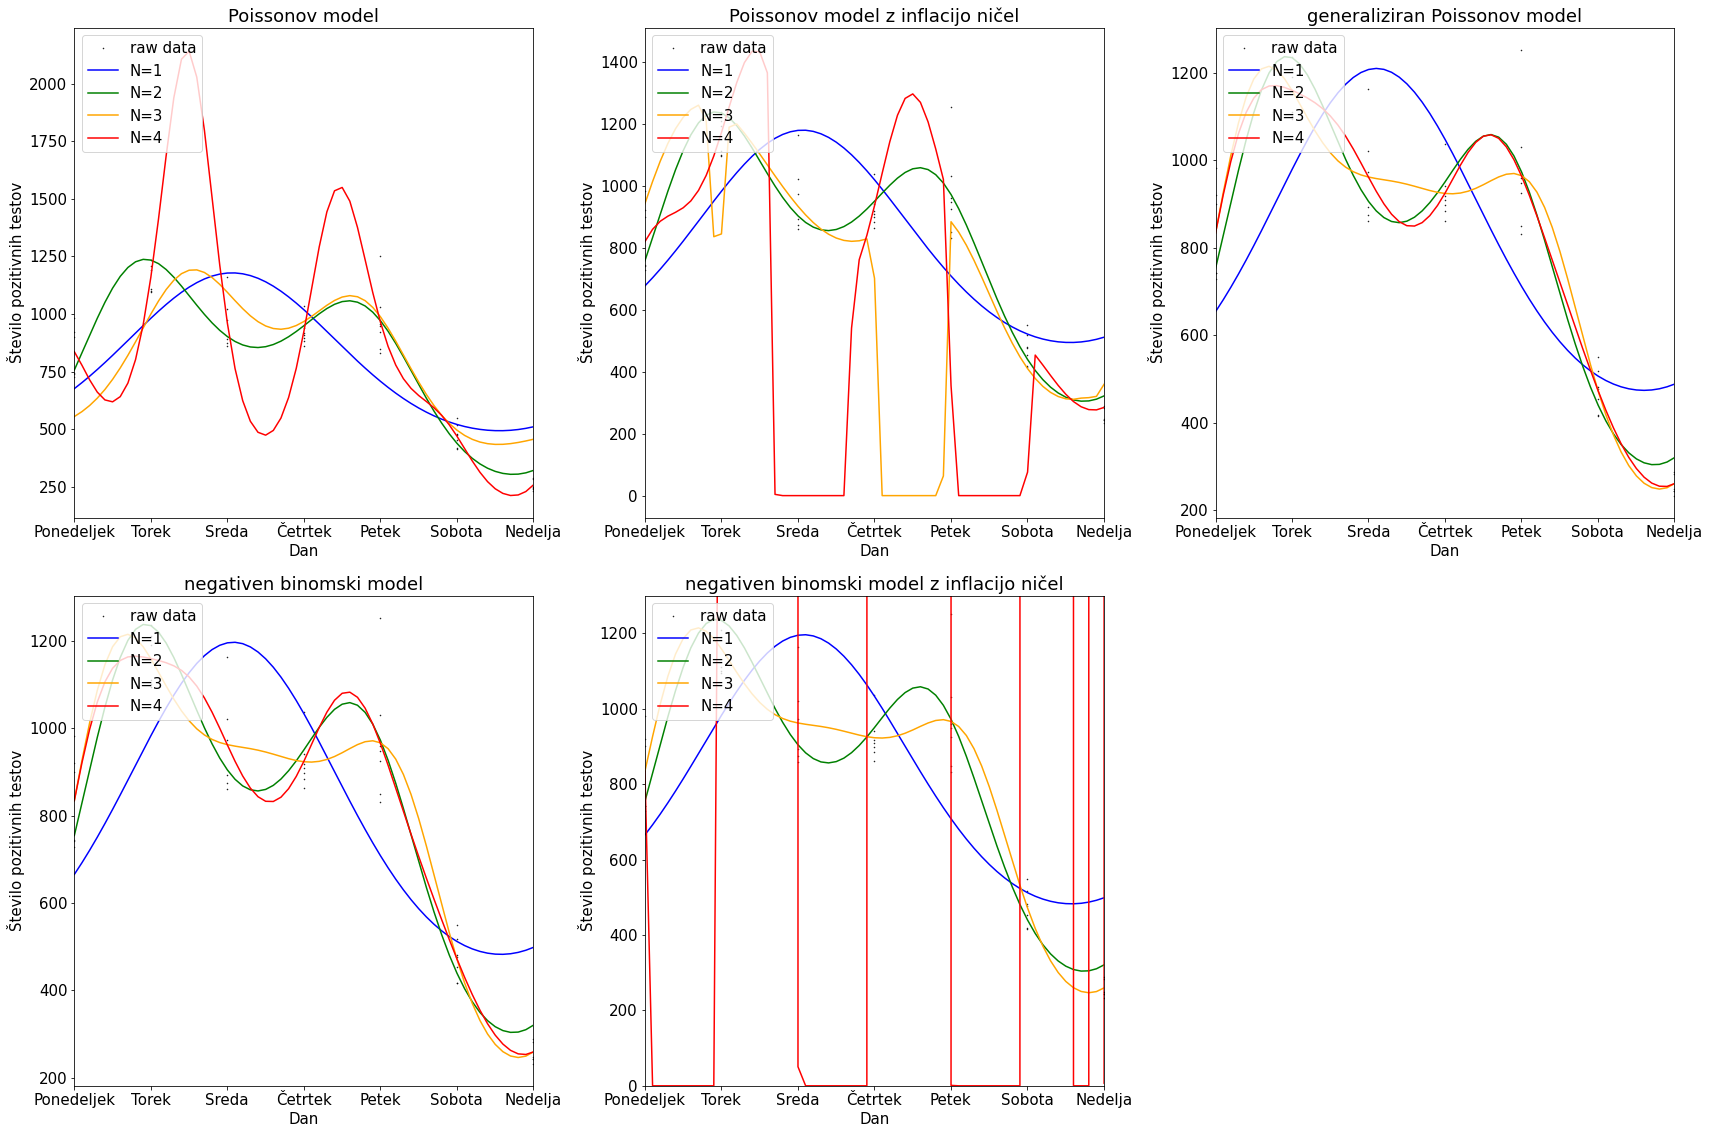

Optimalno št. komponent in tip modela:
Št. komponent: 3
Tip modela: gen_poisson


In [3]:
df_second = pd.read_csv(r'data/data_second.csv')

df_second['date'] = pd.to_datetime(df_second['date'], format='%Y-%m-%d', errors='ignore')

df_second = df_second[['day', 'tests.positive', 'date']]
df_second.columns = ['X', 'Y', 'date']
df_second = dproc.clean_data(df_second)

plot.plot_raw_data(df_second, "", 300, save_file_to="raw_second.pdf")
df_results = dproc.fit_to_models(df_second, period=7, n_components=[1, 2, 3, 4], ax_lim=1300,
                                 save_file_to="models_second.pdf")
n_components2 = int(dproc.get_best_n_components(df_results, 'AIC').n_components)
print("Optimalno št. komponent in tip modela:")
print("Št. komponent: {}".format(n_components2))
model_type2 = dproc.get_best_model_type(df_results, 'Vuong').model_type
print("Tip modela: {}".format(model_type2))
best_model = df_results.loc[
    (df_results['n_components'] == n_components2) & (df_results['model_type'].str.match(model_type2))].iloc[0]

CIs_params = dproc.calculate_confidence_intervals_parameters(df_second, n_components2, model_type2, best_model['peaks'],
                                                             period=7)
best_model = best_model.to_dict()
best_model.update(CIs_params)
best_model['obdobje'] = "11.2.2021-26.4.2021"
results = results.append(best_model, ignore_index=True)


# Obdobje 20.10.2020-26.4.2021

  Varianca:  232223.73043528933  Povprečje:  1082.2519083969466


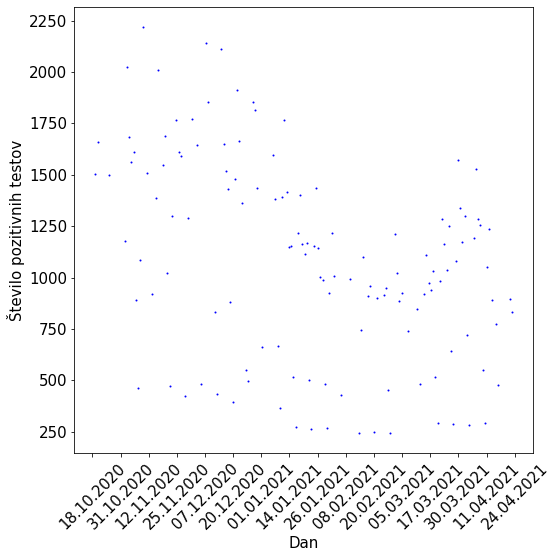

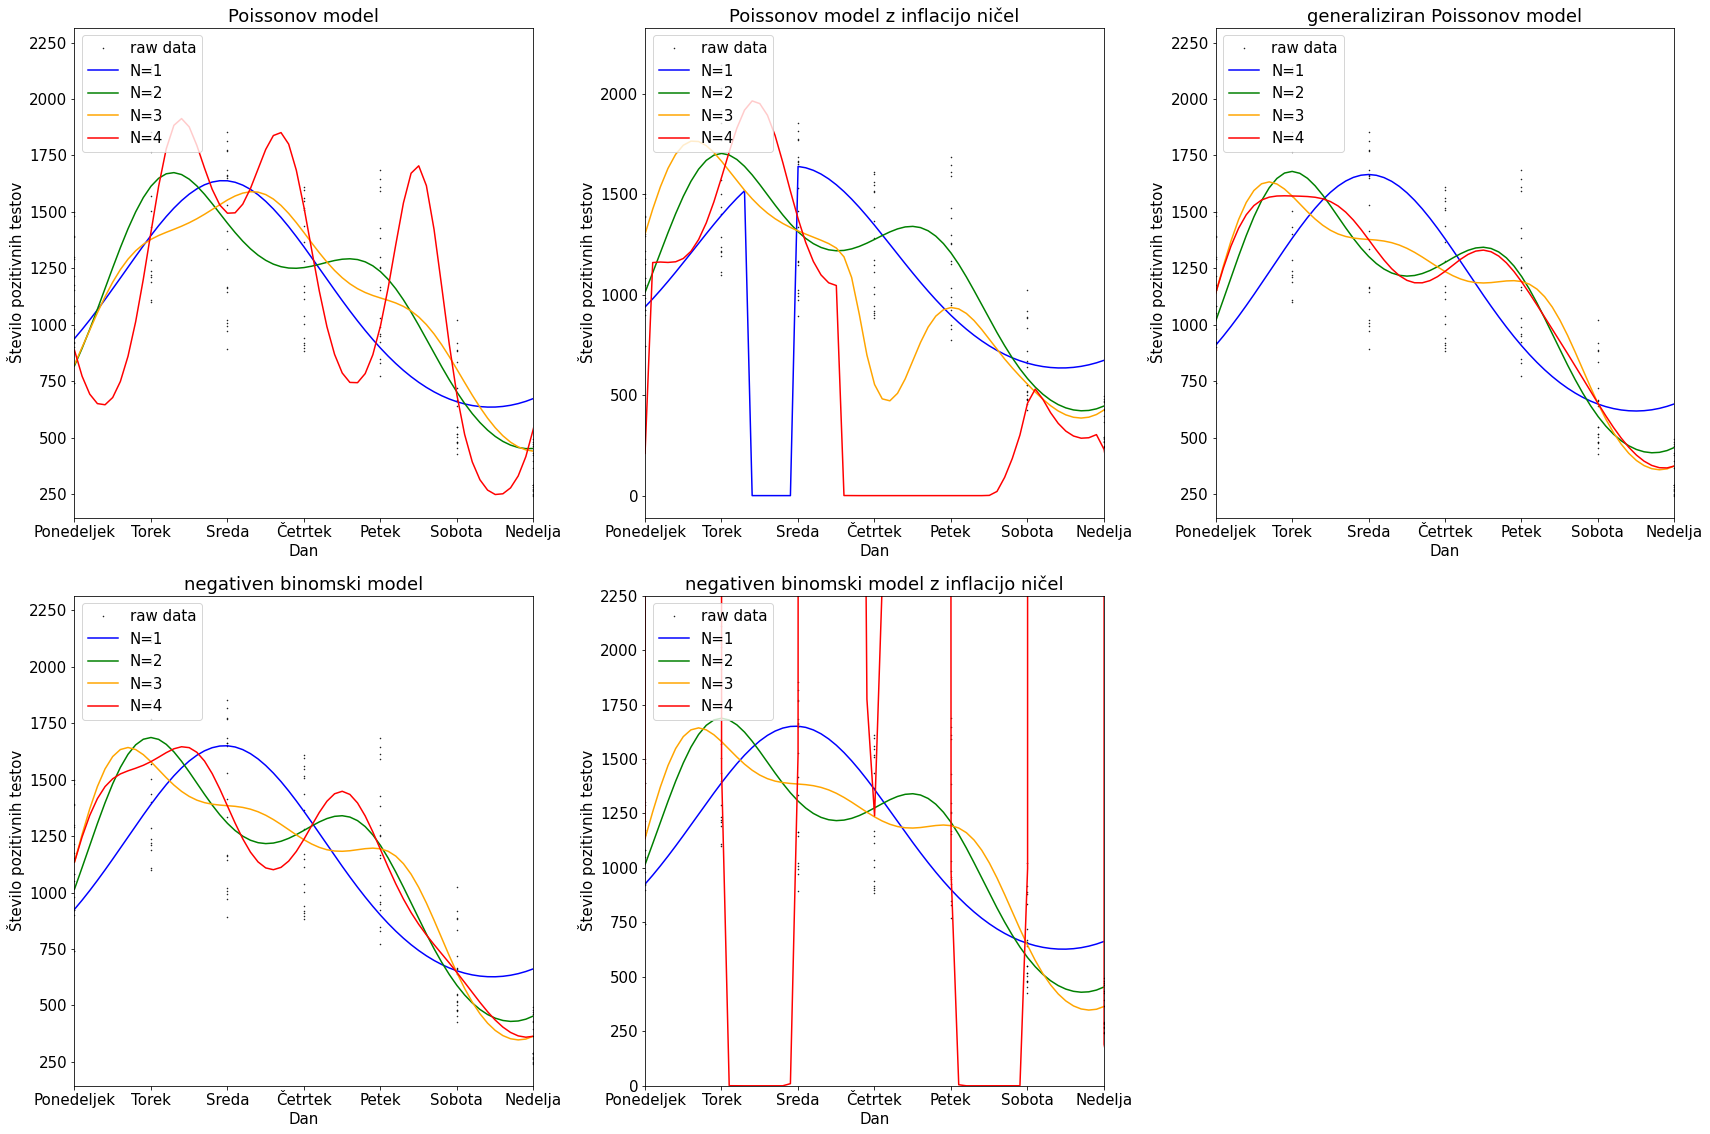

Optimalno št. komponent in tip modela:
Št. komponent: 3
Tip modela: gen_poisson


In [4]:
df_third = pd.read_csv(r'data/data_third.csv')

df_third['date'] = pd.to_datetime(df_third['date'], format='%Y-%m-%d', errors='ignore')

df_third = df_third[['day', 'tests.positive', 'date']]
df_third.columns = ['X', 'Y', 'date']
df_third = dproc.clean_data(df_third)

plot.plot_raw_data(df_third, "", 300, save_file_to="raw_third.pdf")
df_results = dproc.fit_to_models(df_third, period=7, n_components=[1, 2, 3, 4], ax_lim=2250,
                                 save_file_to="models_third.pdf")
n_components3 = int(dproc.get_best_n_components(df_results, 'AIC').n_components)
print("Optimalno št. komponent in tip modela:")
print("Št. komponent: {}".format(n_components3))
model_type3 = dproc.get_best_model_type(df_results, 'Vuong').model_type
print("Tip modela: {}".format(model_type3))
best_model = df_results.loc[
    (df_results['n_components'] == n_components3) & (df_results['model_type'].str.match(model_type3))].iloc[0]

CIs_params = dproc.calculate_confidence_intervals_parameters(df_third, n_components3, model_type3, best_model['peaks'],
                                                             period=7)
best_model = best_model.to_dict()
best_model.update(CIs_params)
best_model['obdobje'] = "20.10.2020-26.4.2021"
results = results.append(best_model, ignore_index=True)

# Zmagovalni modeli za posamezno podatkovno zbirko

,obdobje,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue
0,20.10.2020-10.2.2021,gen_poisson,3.0,794.62,1233.67,[0.7],[2028.29],"[724.77, 886.58]","[1164.61, 1322.75]","[0.64, 0.81]","[1894.86, 2203.85]",1073.398377,1092.353959,-528.699188,1.783867e-36
1,11.2.2021-26.4.2021,gen_poisson,3.0,483.37,731.32,"[0.7, 3.9]","[1214.69, 969.59]","[449.08, 520.37]","[704.1, 759.17]","[[0.57, 0.81], [2.2, 4.83]]","[[1155.02, 1277.7], [930.48, 1032.92]]",529.012852,543.466152,-256.506426,2.267328e-28
2,20.10.2020-26.4.2021,gen_poisson,3.0,637.66,995.12,[0.7],[1632.77],"[576.28, 676.34]","[942.76, 1030.22]","[0.64, 0.8]","[1521.6, 1704.0]",1818.499776,1841.501354,-901.249888,1.225577e-42


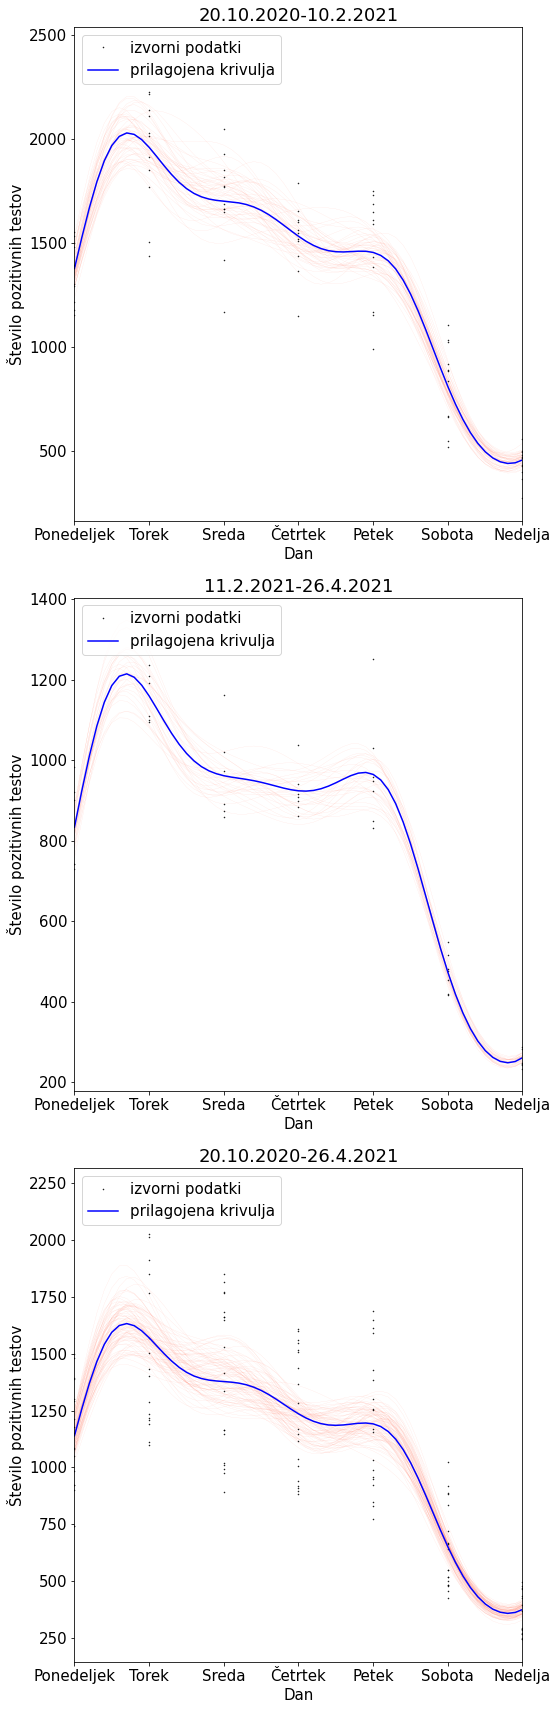

In [5]:
results = results[['obdobje', 'model_type', 'n_components', 'amplitude', 'mesor', 'peaks', 'heights', 'amplitude_CIs',
                   'mesor_CIs', 'peaks_CIs', 'heights_CIs', 'AIC', 'BIC', 'log_likelihood', 'llr_pvalue']]
display(results)
results.to_csv(r'results\CIs_all.csv')

plot.plot_models([df_first, df_second, df_third], [model_type1, model_type2, model_type3],
                 [n_components1, n_components2, n_components3],
                 title=['20.10.2020-10.2.2021', '11.2.2021-26.4.2021', '20.10.2020-26.4.2021'], cols=1, rows=3,
                 period=7, save_file_to='best_models.pdf')
